## Indicador de Desempenho de Estudantes


#### Fluxo do Projeto em Machine Learning

- Compreendendo o Problema
- Coleta de Dados
- Verificações de Dados
- Análise exploratória de Dados (EDA)
- Pré-Processamento de Dados
- Treinamento de Modelo
- Escolha do Melhor Modelo

### 1) O Problema
- Este projeto entende como o desempenho do aluno (pontuações nos testes) é afetado por outras variáveis, como gênero, etnia, nível de escolaridade dos pais, almoço e curso de preparação para testes.


### 2) Coleta de Dados
- Link para o Dataset - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- Os dados consistem em 8 colunas e 1000 linhas.

### 2.1 Importação de Dados e Pacotes Necessários
####  Importação de Bibliotecas Pandas, Numpy, Matplotlib, Seaborn and Warnings.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Transformação de Dados CSV em Pandas DataFrame

In [3]:
df = pd.read_csv('stud.csv')

#### Mostra os 5 primeiros registros

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Formato dos Dados

In [5]:
df.shape

(1000, 8)

### 2.2 Informações sobre o Dataset

- gender : sexo dos estudantes  -> (Male/female)
- race/ethnicity : etnia dos estudantes -> (Group A, B,C, D,E)
- parental level of education : Nível de educação dos pais
- lunch : almoço antes do teste (standard or free/reduced) 
- test preparation course : preparação antes do teste (complete or not complete)
- math score : pontuação em Matemática
- reading score : pontuação em Leitura
- writing score : pontuação em Escrita

### 3. Verificação de Dados

- Verificar Valores Ausentes
- Verificar Valores Duplicados
- Verificar Tipo dos Valores 
- Verificar o número de valores únicos de cada coluna
- Verificar as estatísticas do Dataset
- Verificar as várias categorias presentes nas diferentes colunas categóricas

### 3.1 Verificar Valores Ausentes

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### Não há valores ausentes no Dataset

### 3.2 Verificar Valores Duplicados

In [7]:
df.duplicated().sum()

0

#### Não há valores duplicados no Dataset

### 3.3 Verificar Tipo dos Valores

In [8]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Verificando o número de valores únicos de cada coluna

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Verificar as estatísticas do Dataset

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Informações
- Pela descrição dos dados numéricos acima, todas as médias estão muito próximas umas das outras - entre 66 e 68,05;
- Todos os desvios padrão também estão próximos – entre 14,6 e 15,19;
- Embora haja uma pontuação mínima de 0 para matemática, para escrita o mínimo é muito maior = 10 e para leitura é mais alto = 17

### 3.7 Explorando os Dados

In [11]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
print("Categorias na variável 'gender':     ",end=" " )
print(df['gender'].unique())

print("Categorias na variável 'race_ethnicity':  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categorias na variável 'parental level of education':",end=" " )
print(df['parental_level_of_education'].unique())

print("Categorias na variável 'lunch':     ",end=" " )
print(df['lunch'].unique())

print("Categorias na variável 'test preparation course':     ",end=" " )
print(df['test_preparation_course'].unique())

Categorias na variável 'gender':      ['female' 'male']
Categorias na variável 'race_ethnicity':   ['group B' 'group C' 'group A' 'group D' 'group E']
Categorias na variável 'parental level of education': ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categorias na variável 'lunch':      ['standard' 'free/reduced']
Categorias na variável 'test preparation course':      ['none' 'completed']


In [13]:
# defina as colunas numéricas e categóricas
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('Nós temos {} colunas numéricas : {}'.format(len(numeric_features), numeric_features))
print('\nNós temos {} colunas categóricas : {}'.format(len(categorical_features), categorical_features))

Nós temos 3 colunas numéricas : ['math_score', 'reading_score', 'writing_score']

Nós temos 5 colunas categóricas : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [14]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### 3.8 Adicionando colunas para "Pontuação Total" e "Média"

In [15]:
df['pontuacao total'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['media'] = df['pontuacao total']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,pontuacao total,media
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
reading_full = df[df['reading_score'] == 100]['media'].count()
writing_full = df[df['writing_score'] == 100]['media'].count()
math_full = df[df['math_score'] == 100]['media'].count()

print(f'Número de Estudantes com nota máxima em Matemática: {math_full}')
print(f'Número de Estudantes com nota máxima em Escrita: {writing_full}')
print(f'Número de Estudantes com nota máxima em Leitura: {reading_full}')

Número de Estudantes com nota máxima em Matemática: 7
Número de Estudantes com nota máxima em Escrita: 14
Número de Estudantes com nota máxima em Leitura: 17


In [17]:
reading_less_20 = df[df['reading_score'] <= 20]['media'].count()
writing_less_20 = df[df['writing_score'] <= 20]['media'].count()
math_less_20 = df[df['math_score'] <= 20]['media'].count()

print(f'Número de Estudantes com menos de 20 ponto em Matemática: {math_less_20}')
print(f'Número de Estudantes com menos de 20 ponto em Escrita: {writing_less_20}')
print(f'Número de Estudantes com menos de 20 ponto em Leitura: {reading_less_20}')

Número de Estudantes com menos de 20 ponto em Matemática: 4
Número de Estudantes com menos de 20 ponto em Escrita: 3
Número de Estudantes com menos de 20 ponto em Leitura: 1


#####  Informações
 - A partir dos valores acima, obtemos que os alunos tiveram o pior desempenho em matemática 
 - O melhor desempenho está na seção de leitura

### 4.Explorando Dados (Visualização)
#### 4.1 Visualize a distribuição da pontuação média para tirar alguma conclusão. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

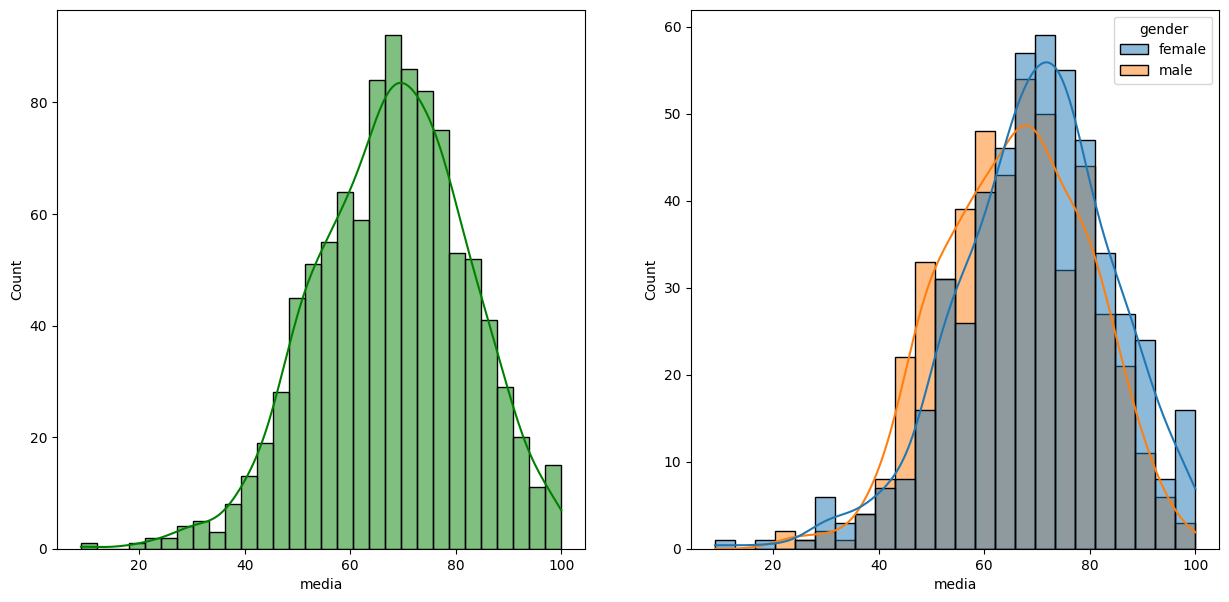

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='media',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='media',kde=True,hue='gender')
plt.show()

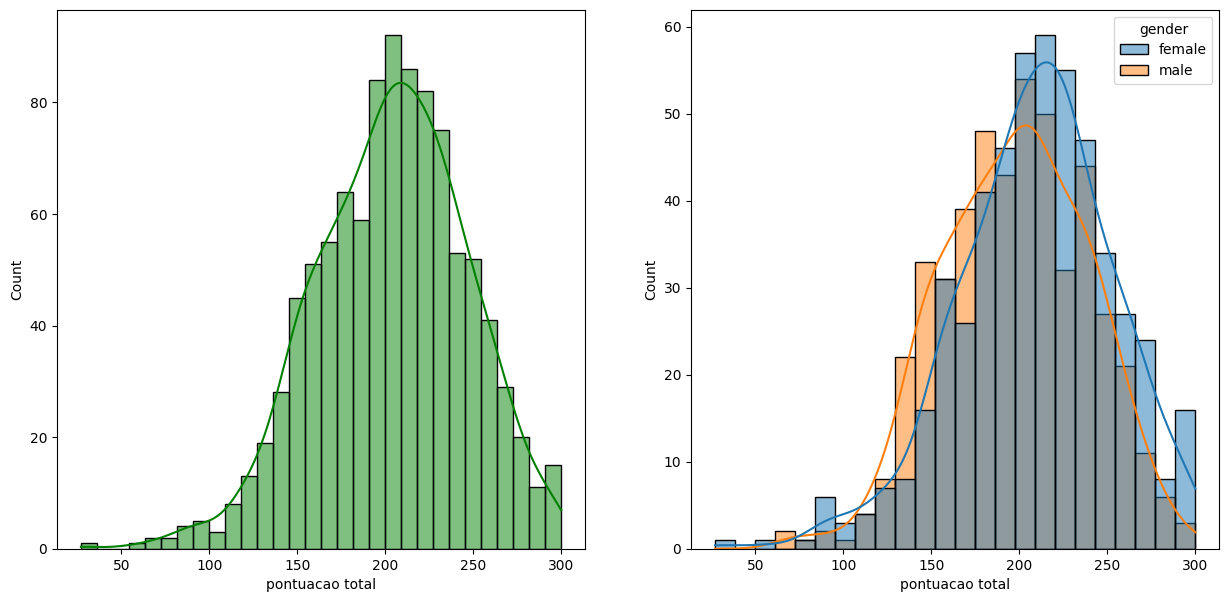

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='pontuacao total',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='pontuacao total',kde=True,hue='gender')
plt.show()

#####  Informações
- Os estudantes do sexo feminino tendem a ter um melhor desempenho do que os estudantes do sexo masculino.

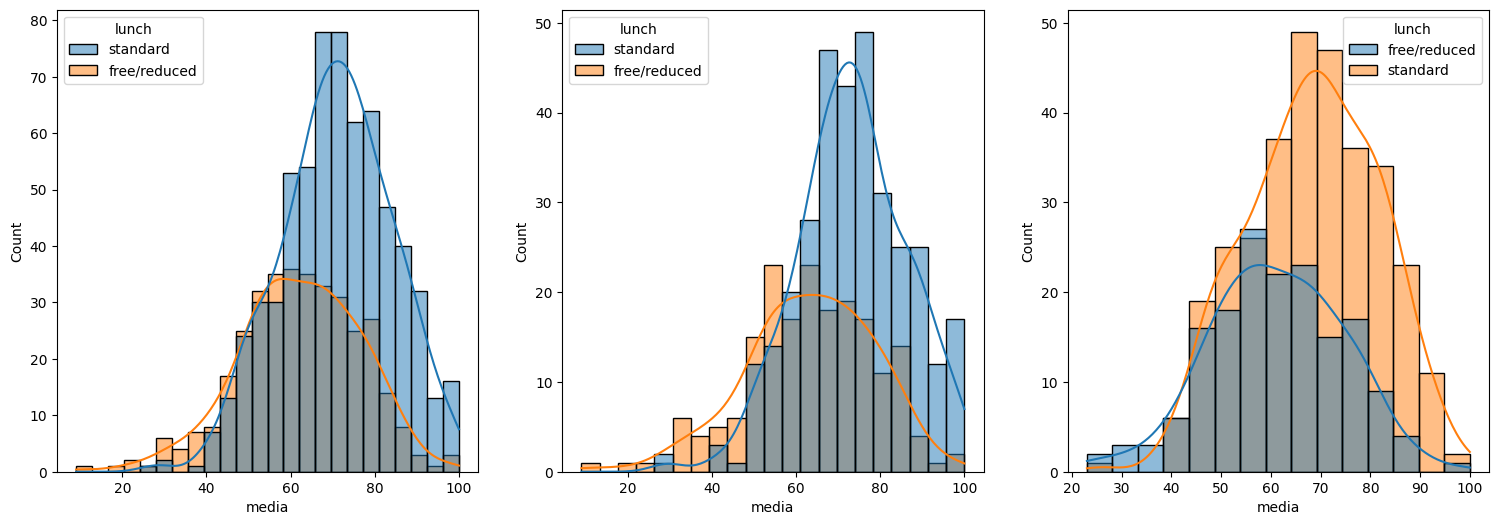

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='media',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='media',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='media',kde=True,hue='lunch')
plt.show()

#####  Informações
- O almoço ajuda a ter um bom desempenho nos exames.
- O almoço ajuda a ter um bom desempenho nos exames, seja masculino ou feminino.

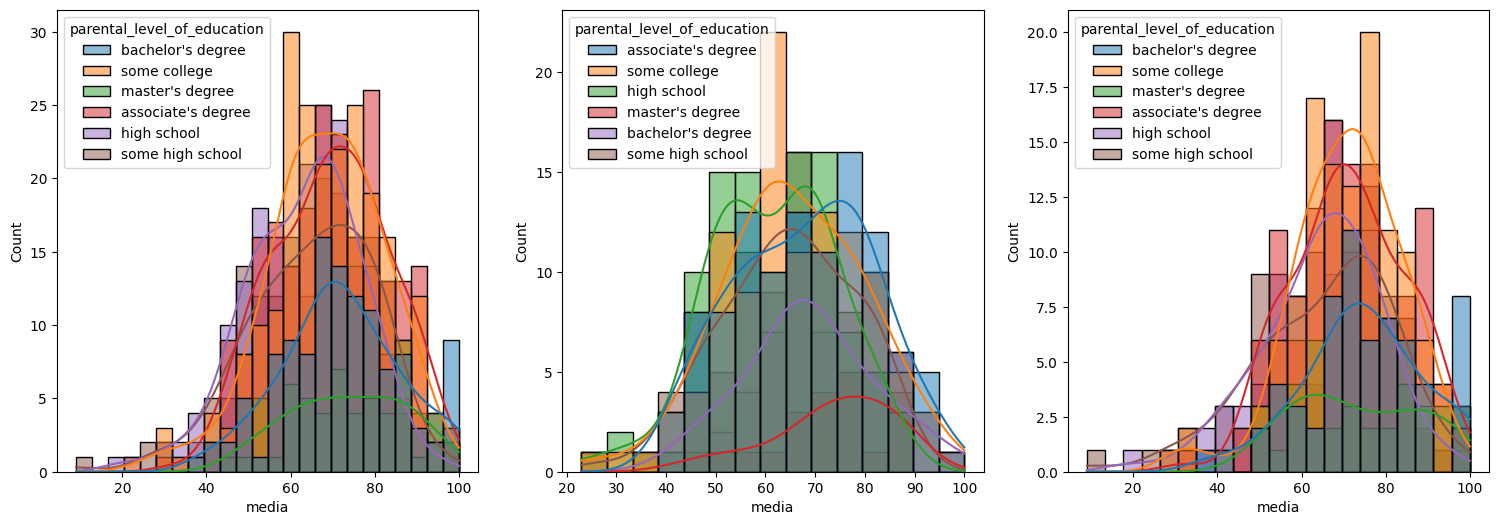

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='media',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='media',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='media',kde=True,hue='parental_level_of_education')
plt.show()

#####  Informações
- Em geral, a educação dos pais não ajuda o aluno a ter um bom desempenho no exame.
- O segundo gráfico mostra que os pais cuja formação é de bacharelado ou mestrado de seu filho do sexo masculino tendem a ter um bom desempenho no exame.
- No terceiro gráfico, podemos ver que não há efeito da educação dos pais nas alunas.

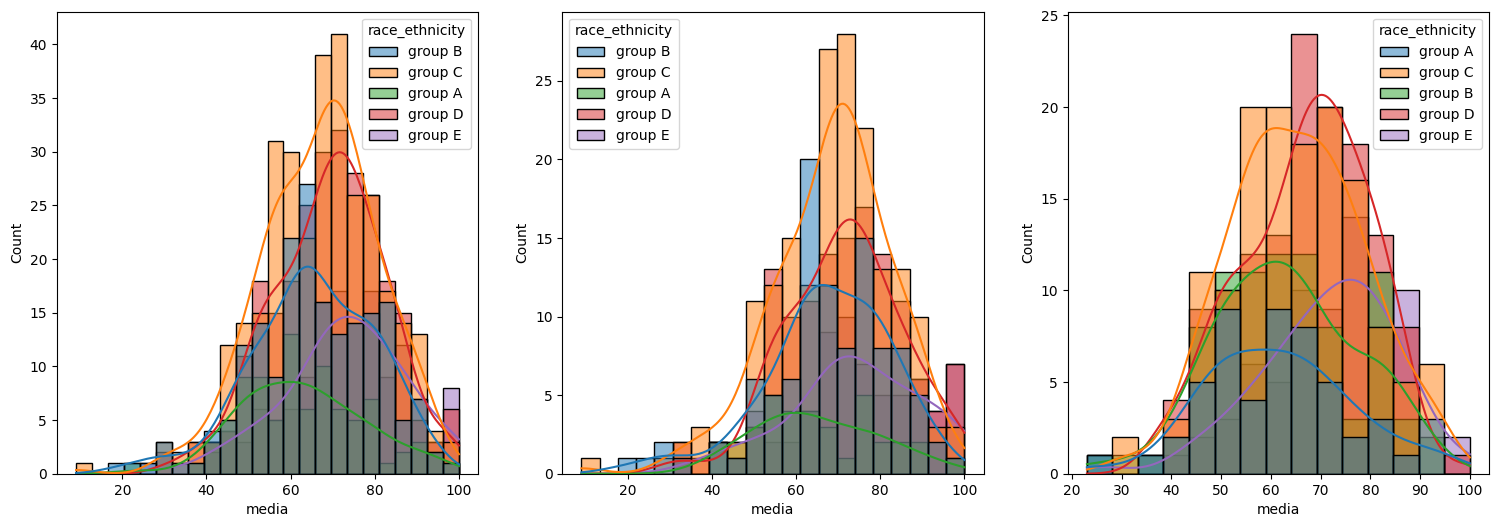

In [22]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='media',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='media',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='media',kde=True,hue='race_ethnicity')
plt.show()

#####  Informações
- Os alunos do grupo A e do grupo B tendem a ter um desempenho ruim no exame.
- Os alunos do grupo A e do grupo B tendem a ter um desempenho ruim nos exames, independentemente de serem homens ou mulheres.

#### 4.2 Pontuação máxima dos alunos nas três disciplinas

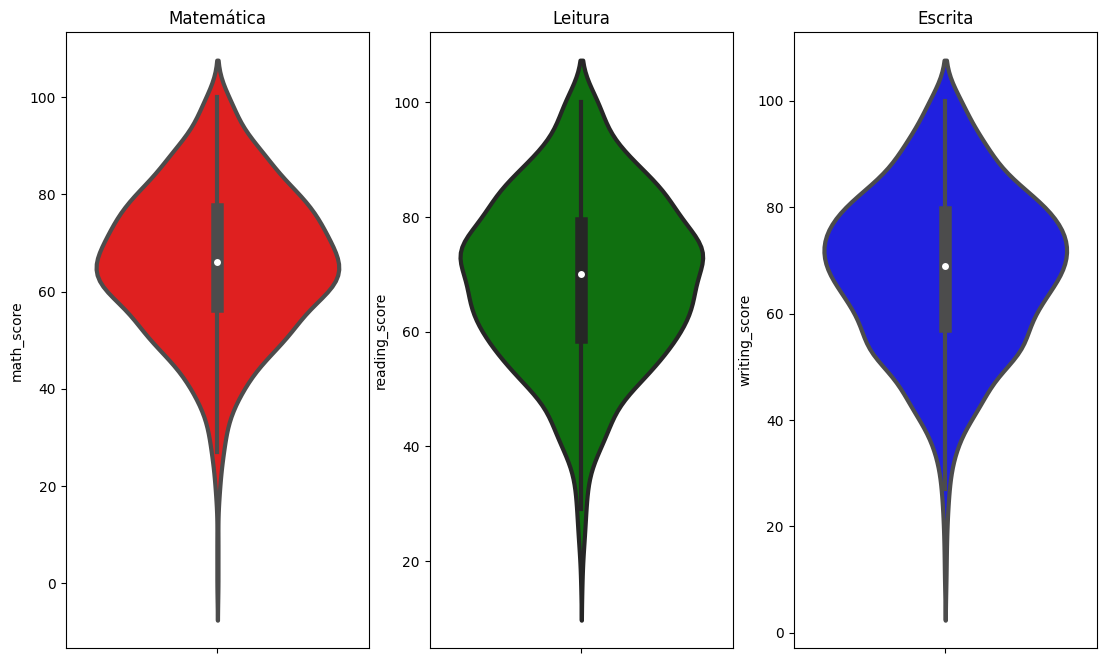

In [23]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('Matemática')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('Leitura')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('Escrita')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

#### Informações
- A partir dos três gráficos acima, é claramente visível que a maioria dos alunos pontua entre 60-80 em matemática, enquanto em leitura e escrita a maioria deles pontua entre 50-80.

#### 4.3 Multivariate analysis using pieplot

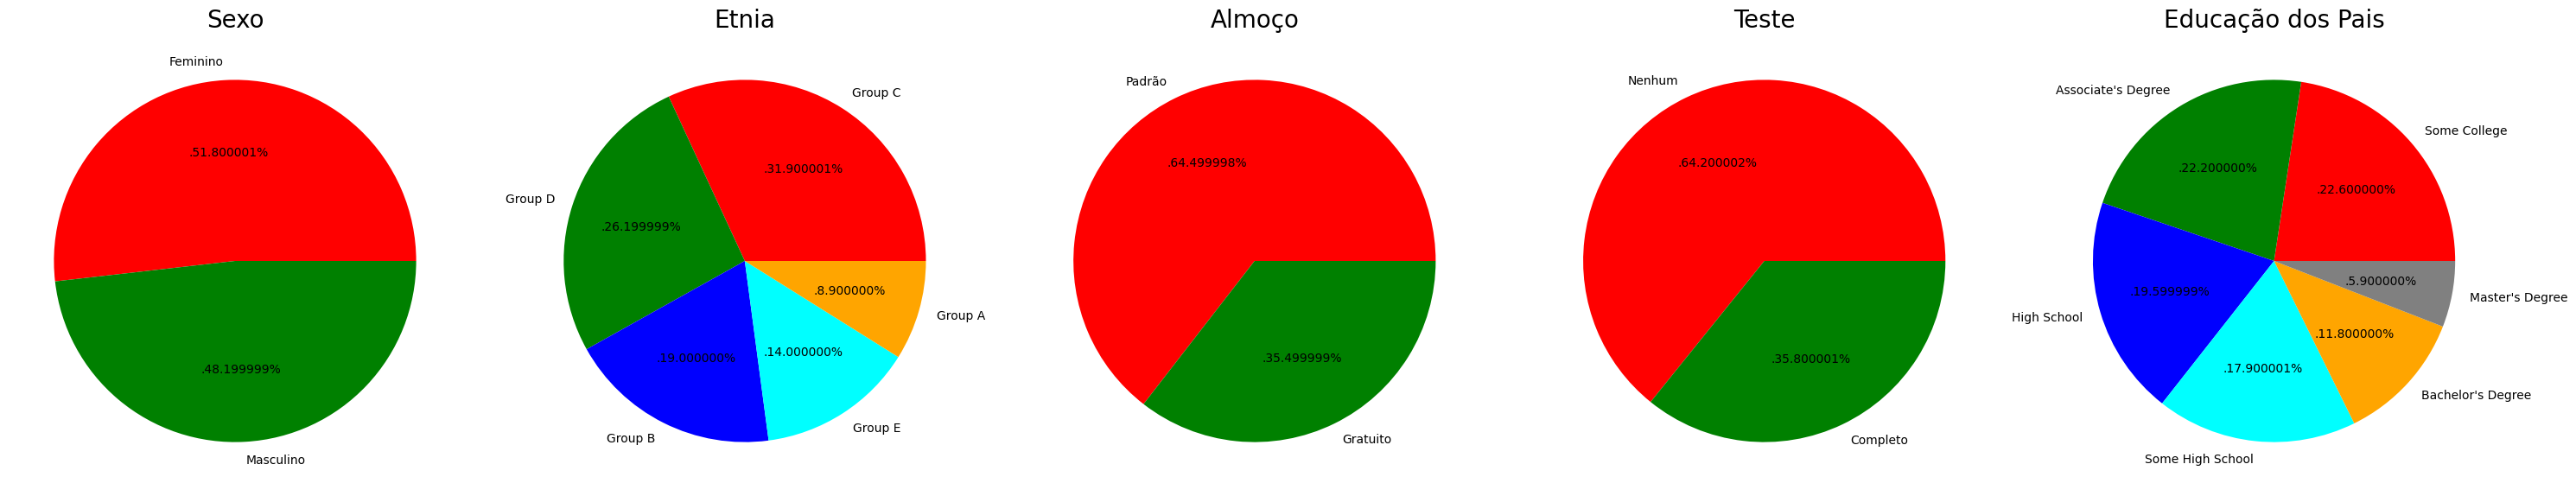

In [24]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Feminino', 'Masculino'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Sexo', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Etnia', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Padrão', 'Gratuito'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Almoço', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'Nenhum', 'Completo'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Teste', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Educação dos Pais', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#####  Informações
- O número de alunos e alunas é quase igual.
- O número de estudantes é maior no Grupo C.
- O número de estudantes que almoçam (Standard) é maior.
- Número de alunos que não se inscreveram em nenhum curso preparatório para provas é maior.
- O número de alunos cuja formação parental é "Alguma faculdade" é maior, seguido de perto por "Diploma de associado".

#### 4.4 Visualização das características (features)
#### 4.4.1 Coluna SEXO
- Como é a distribuição por sexo?
- O sexo (gênero), tem algum impacto no desempenho dos alunos?

#### UNIVARIATE ANALYSIS ( Como é a distribuição por sexo? )

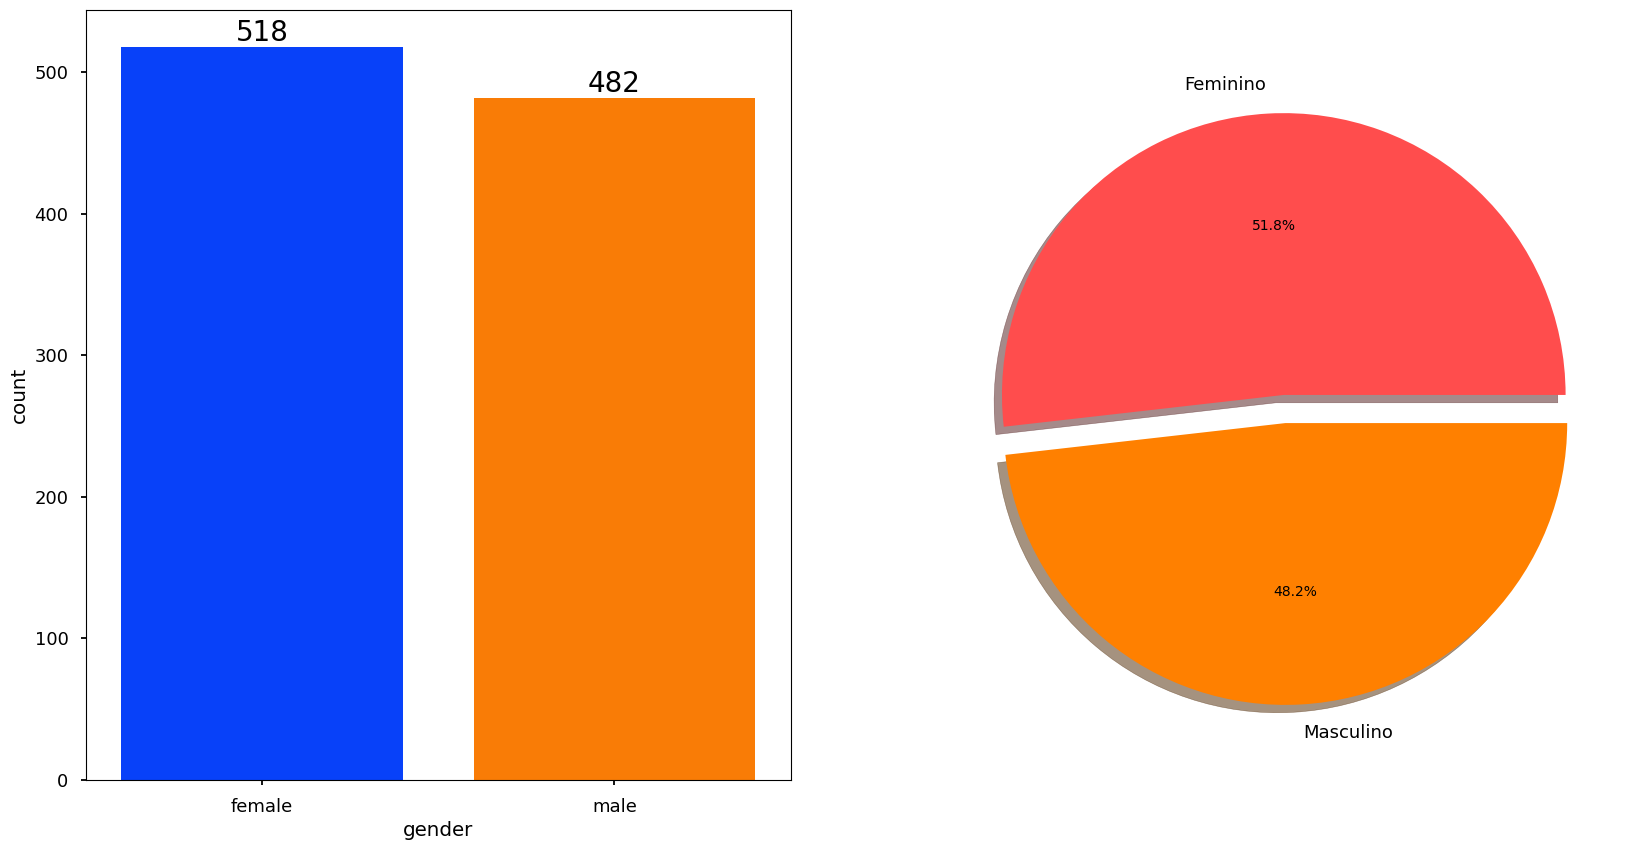

In [41]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Feminino','Masculino'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Informações 
- O sexo (gênero), tem dados equilibrados com os estudantes do sexo feminino são 518 (52%) e os estudantes do sexo masculino são 482 (48%) 

#### BIVARIATE ANALYSIS ( O sexo (gênero), tem algum impacto no desempenho do estudante? ) 

In [42]:
gender_group = df.groupby('gender')#.mean()
gender_group['gender'].tail()

985      male
987      male
990      male
993    female
994      male
995    female
996      male
997    female
998    female
999    female
Name: gender, dtype: object

In [43]:
female_scores = [df[df.gender == 'female'].media, df[df.gender == 'female'].math_score]
female_scores[0]

0      72.666667
1      82.333333
2      92.666667
5      77.333333
6      91.666667
         ...    
993    69.333333
995    94.000000
997    65.000000
998    74.333333
999    83.000000
Name: media, Length: 518, dtype: float64

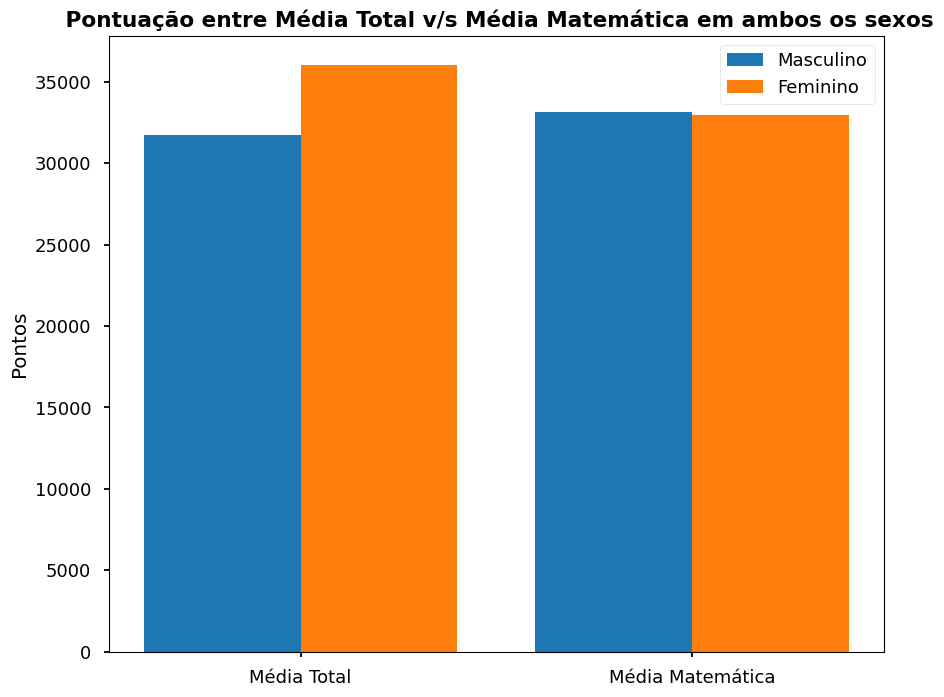

In [44]:
plt.figure(figsize=(10, 8))

X = ['Média Total','Média Matemática']

'''
female_scores = [gender_group['media'][0], gender_group['math_score'][0]]
male_scores = [gender_group['media'][1], gender_group['math_score'][1]]
'''
female_scores = [df[df.gender == 'female'].media.sum(), df[df.gender == 'female'].math_score.sum()]
male_scores = [df[df.gender == 'male'].media.sum(), df[df.gender == 'male'].math_score.sum()]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Masculino')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Feminino')
  
plt.xticks(X_axis, X)
plt.ylabel("Pontos")
plt.title(" Pontuação entre Média Total v/s Média Matemática em ambos os sexos", fontweight='bold')
plt.legend()
plt.show()

#### Informações 
- Em média, as mulheres têm uma pontuação geral melhor que os homens.
- Enquanto os homens obtiveram pontuações mais altas em matemática.

#### 4.4.2 Etnia
- Como é a distribuição por grupo?
- A etnia tem algum impacto no desempenho dos alunos?

#### UNIVARIATE ANALYSIS ( Como é a distribuição por grupo?)

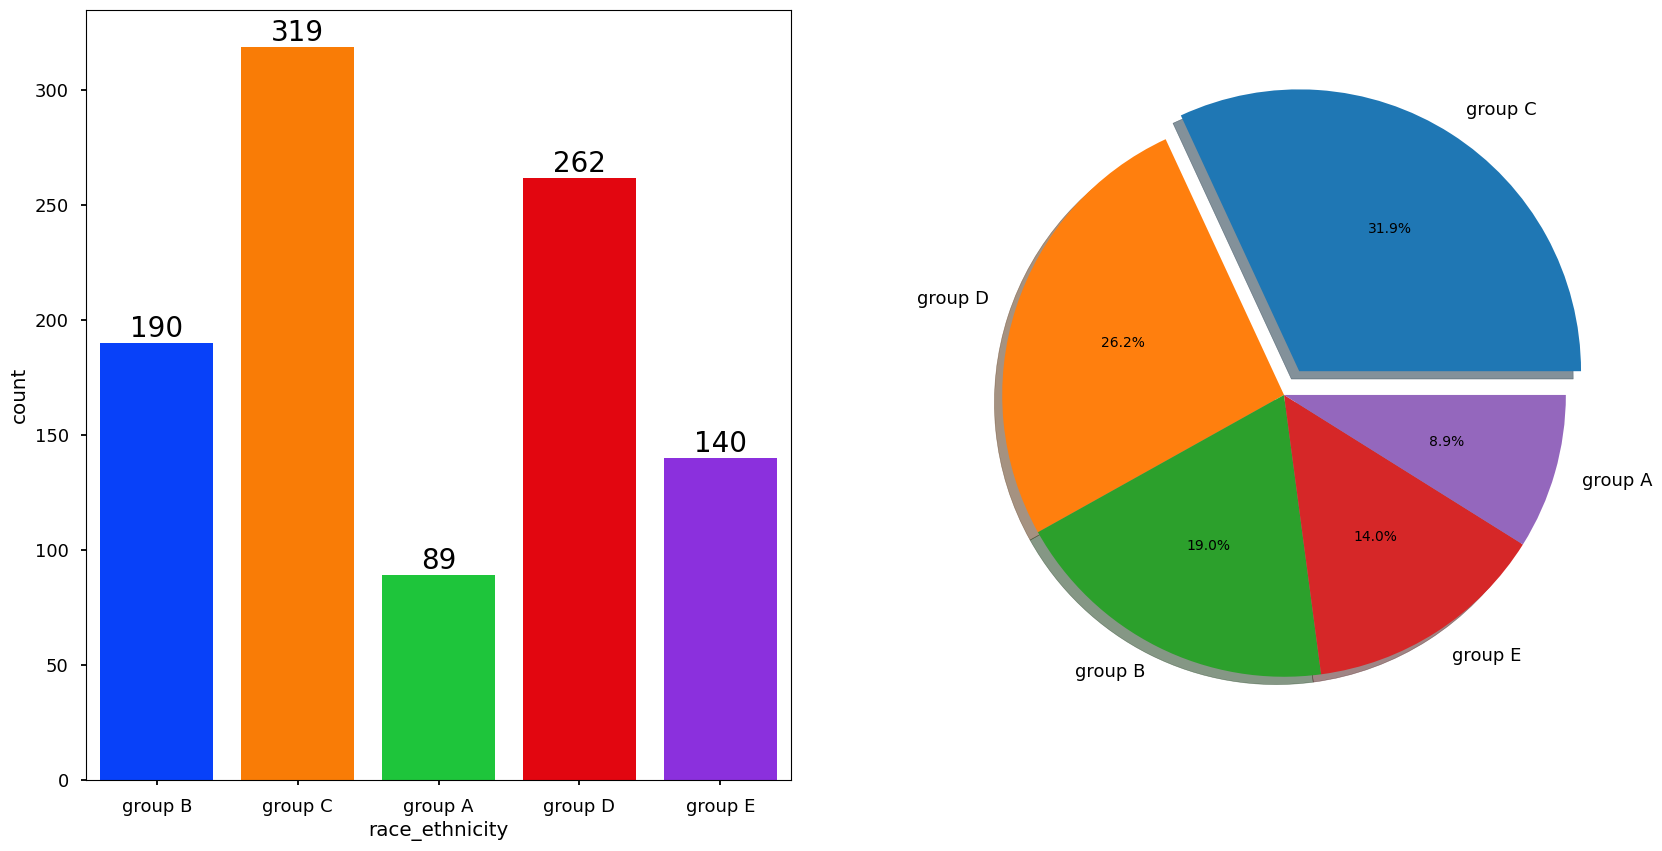

In [45]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights 
- A maioria dos alunos pertence ao grupo C/grupo D.
- O menor número de alunos pertence ao grupo A.

#### BIVARIATE ANALYSIS ( A etnia tem algum impacto no desempenho dos alunos? )

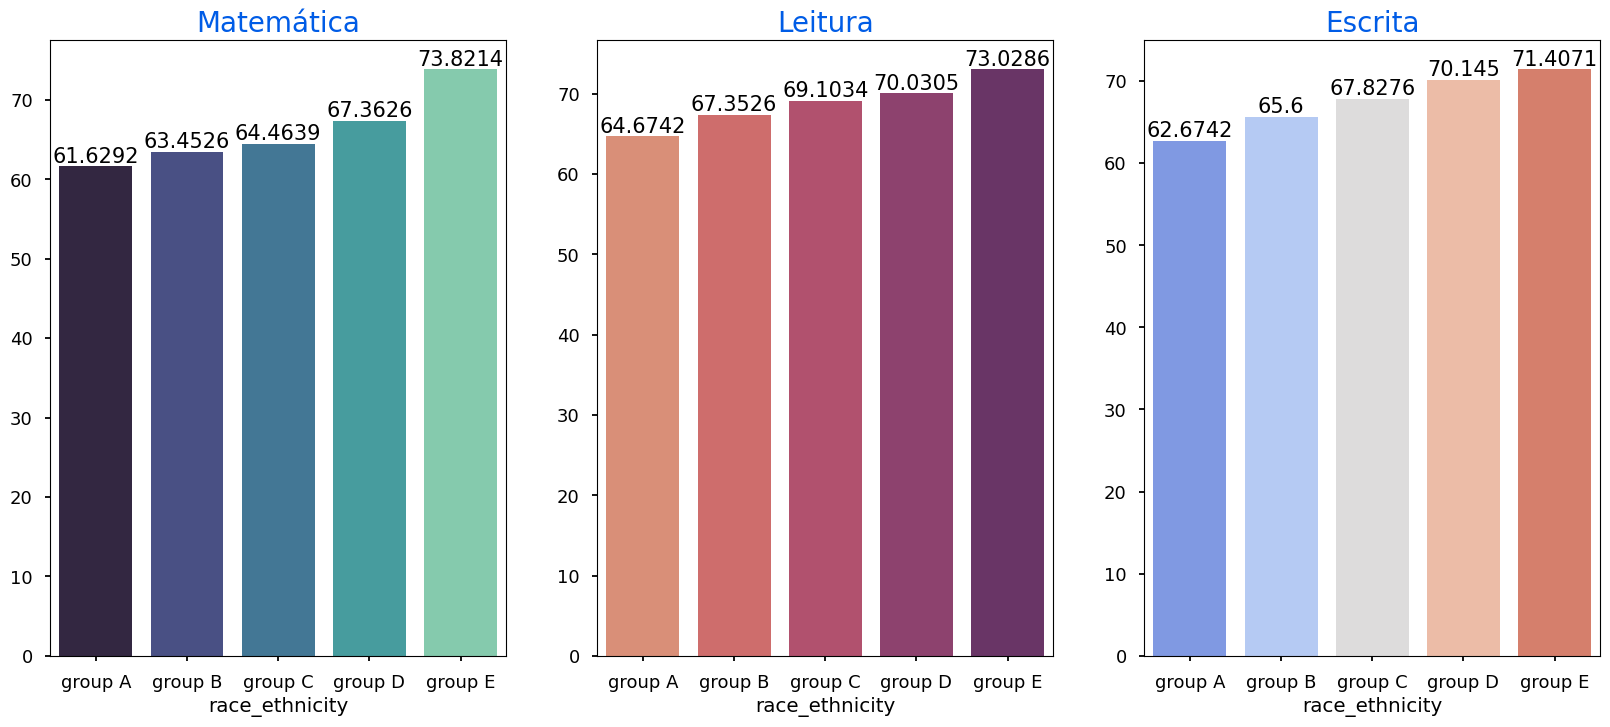

In [46]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Matemática',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Leitura',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Escrita',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Informações 
- Os alunos do grupo E obtiveram as notas mais altas. 
- Os alunos do grupo A obtiveram as notas mais baixas. 
- Alunos de nível socioeconômico mais baixo têm média inferior em todas as disciplinas do curso.

#### 4.4.3 Nível de Educação dos Pais
- Qual é a formação educacional dos pais do aluno?
- A educação dos pais tem algum impacto no desempenho dos alunos?

#### UNIVARIATE ANALYSIS ( Qual é a formação educacional dos pais do aluno? )

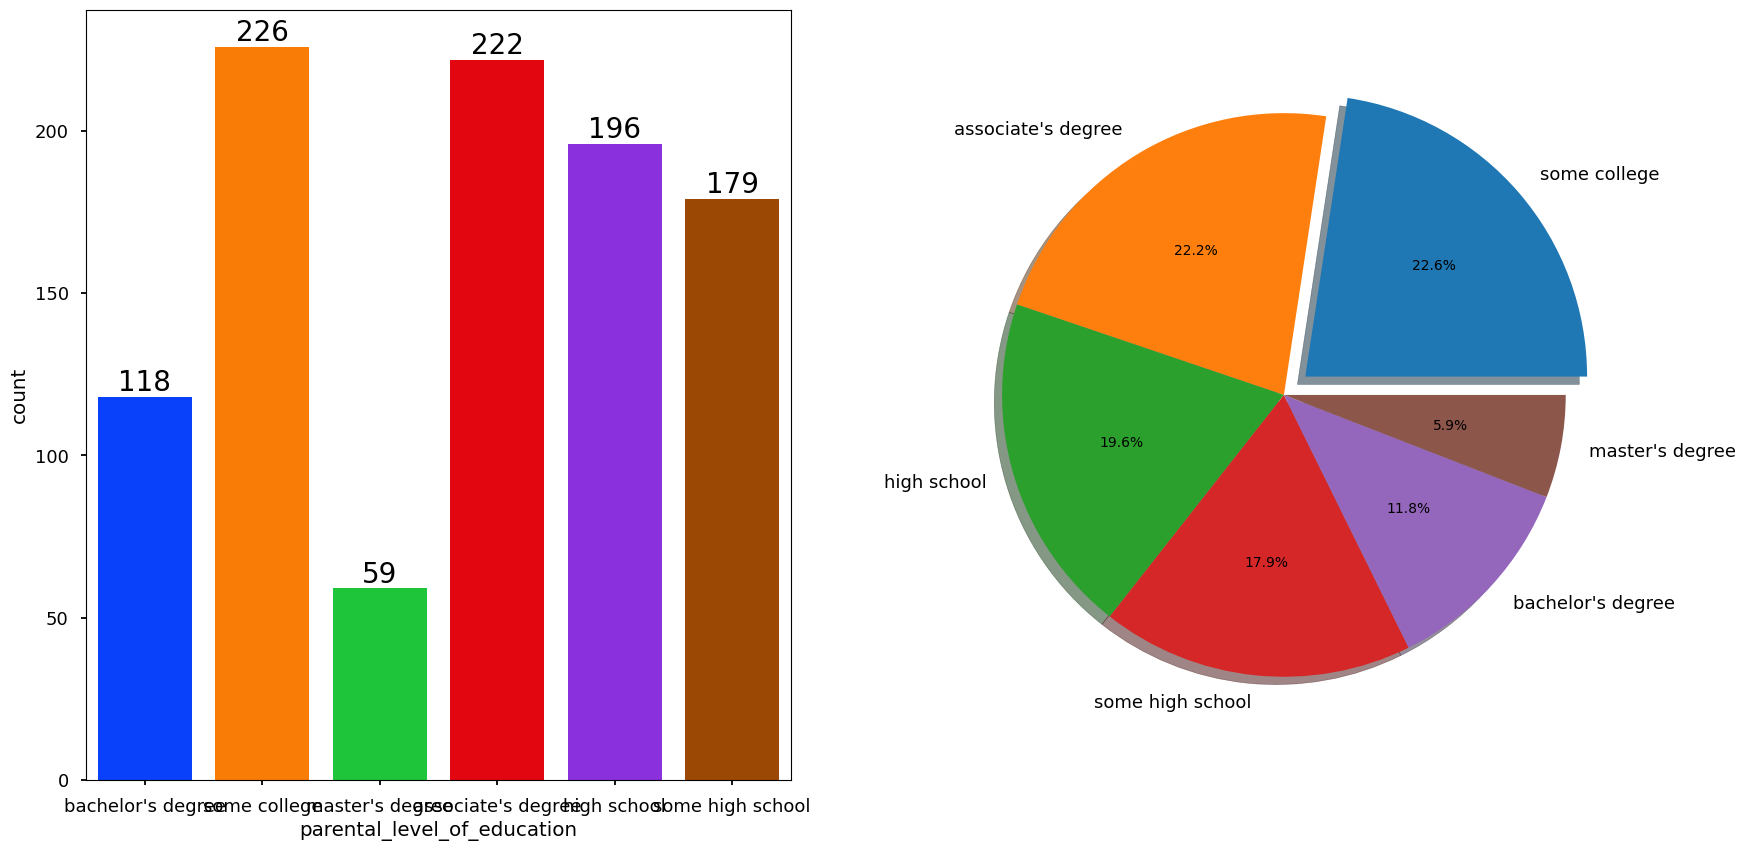

In [47]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x = df['parental_level_of_education'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['parental_level_of_education'].value_counts(),labels=df['parental_level_of_education'].value_counts().index,explode=[0.1,0,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Informações 
- O maior número de pais é de alguma faculdade.

#### BIVARIATE ANALYSIS ( A educação dos pais tem algum impacto no desempenho dos alunos? )

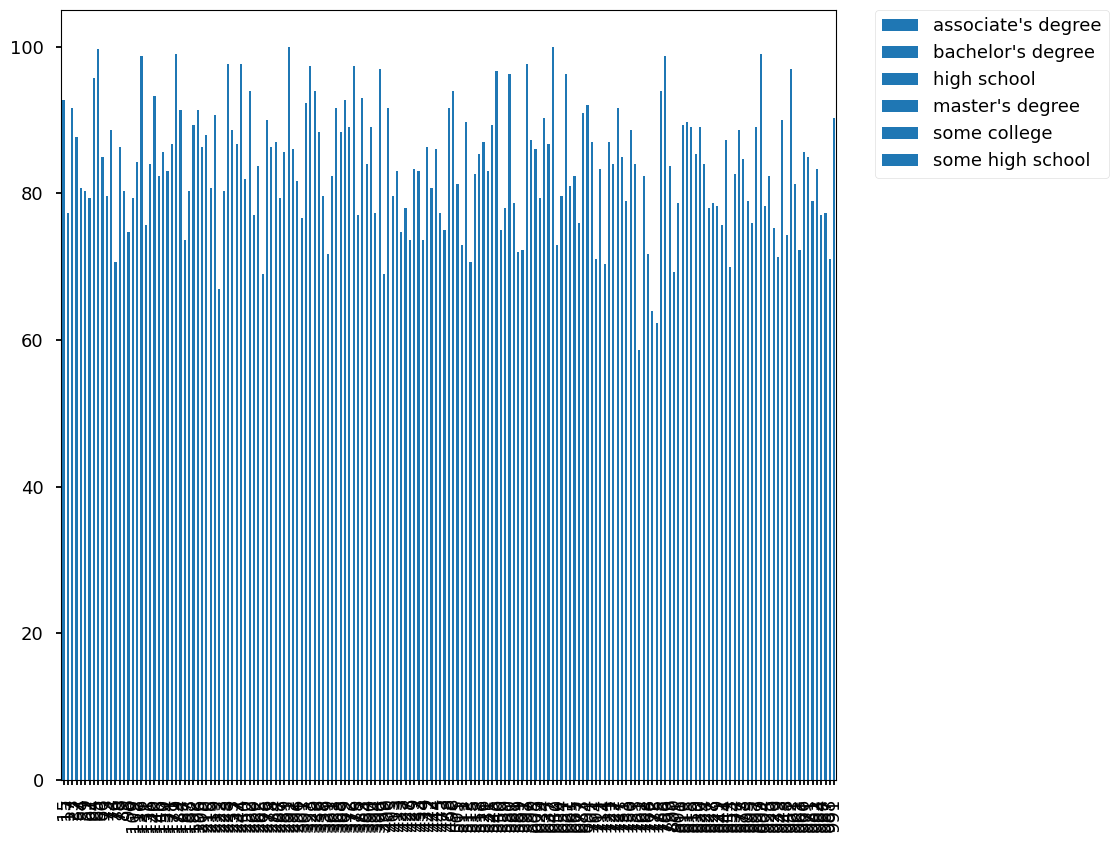

In [48]:
df.groupby('parental_level_of_education').agg('media').plot(kind='bar',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Informações 
- A pontuação dos alunos cujos pais possuem ensino de mestrado e bacharelado é maior que a dos demais.

#### 4.4.4 ALMOÇO 
- Que tipo de almoço é mais comum entre os estudantes?
- Qual é o efeito do tipo de almoço nos resultados dos testes?


#### UNIVARIATE ANALYSIS ( Que tipo de almoço é mais comum entre os estudantes? )

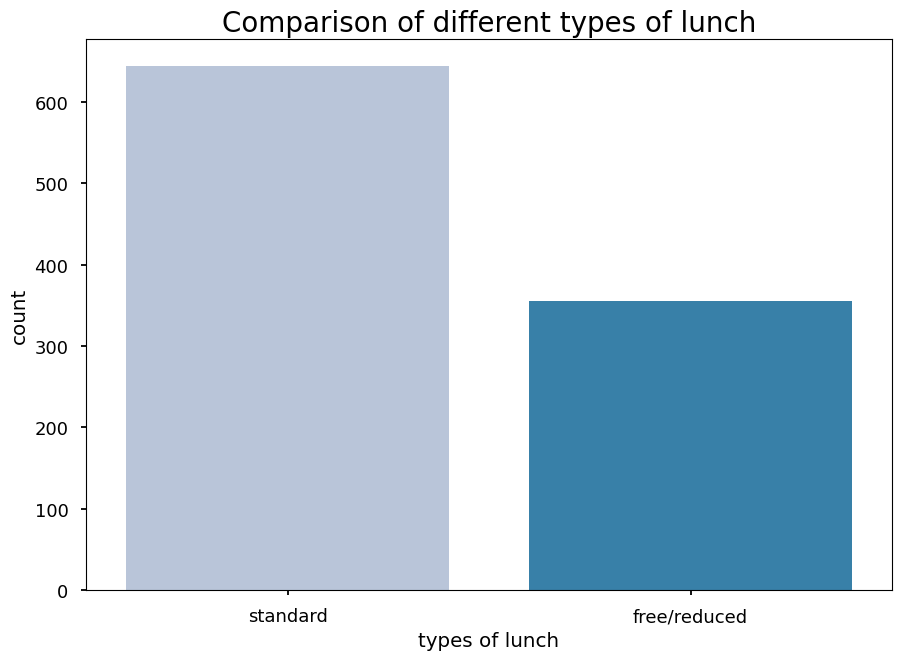

In [49]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(x= 'lunch', data = df, palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

In [50]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'pontuacao total', 'media'],
      dtype='object')

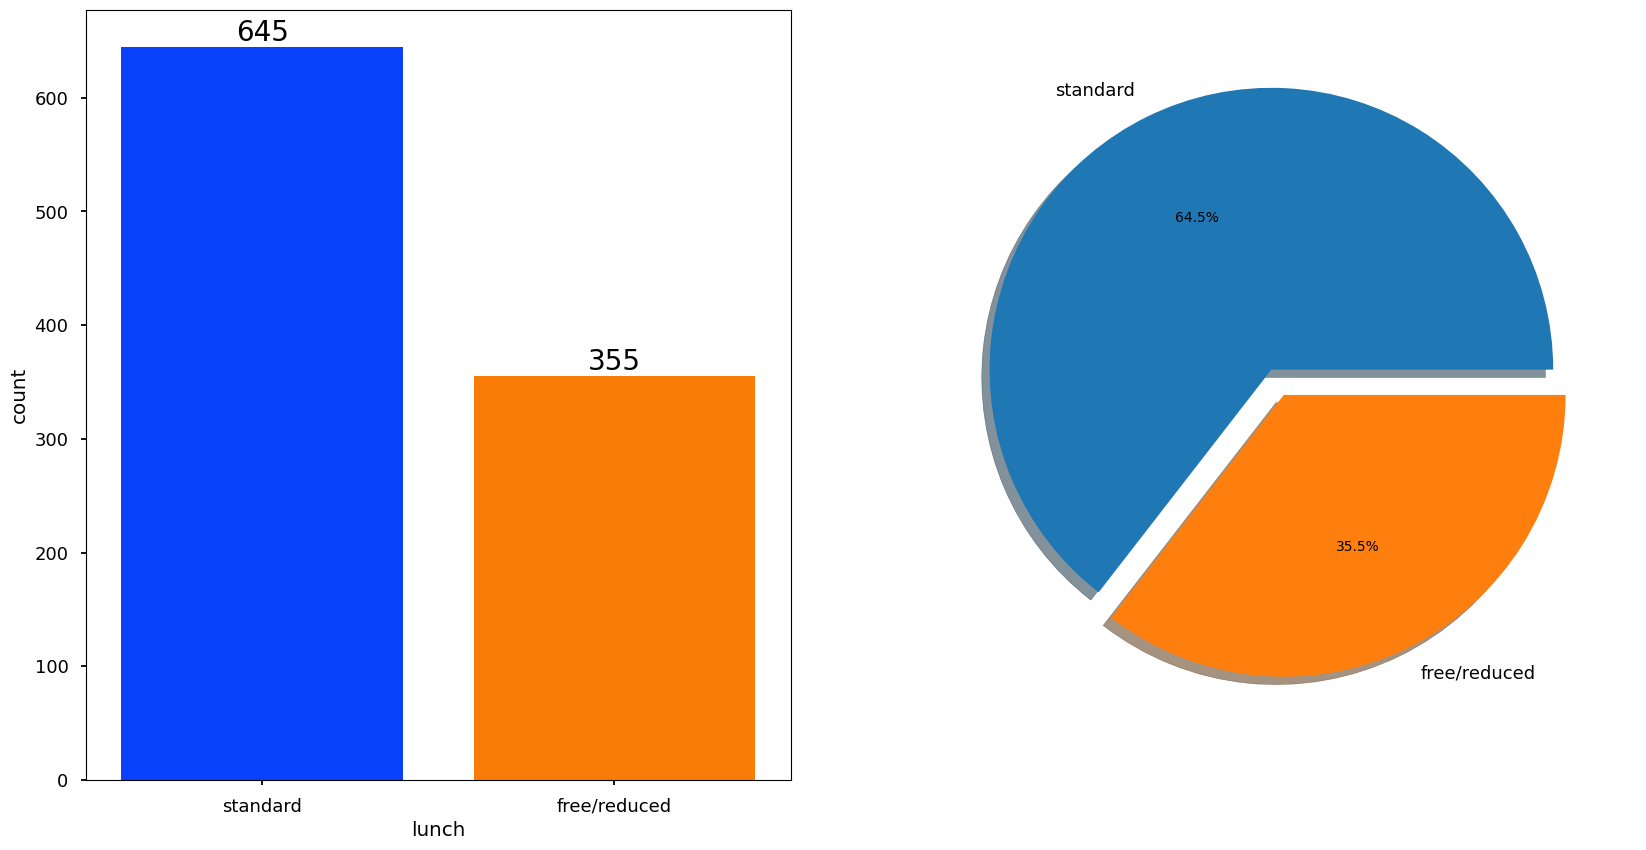

In [51]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x = df['lunch'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['lunch'].value_counts(),labels=df['lunch'].value_counts().index,explode=[0.1,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Informações 
- Alunos recebendo almoço padrão era mais do que almoço grátis.

#### BIVARIATE ANALYSIS (O tipo de almoço tem algum impacto no desempenho dos alunos?)

<Axes: xlabel='lunch', ylabel='writing_score'>

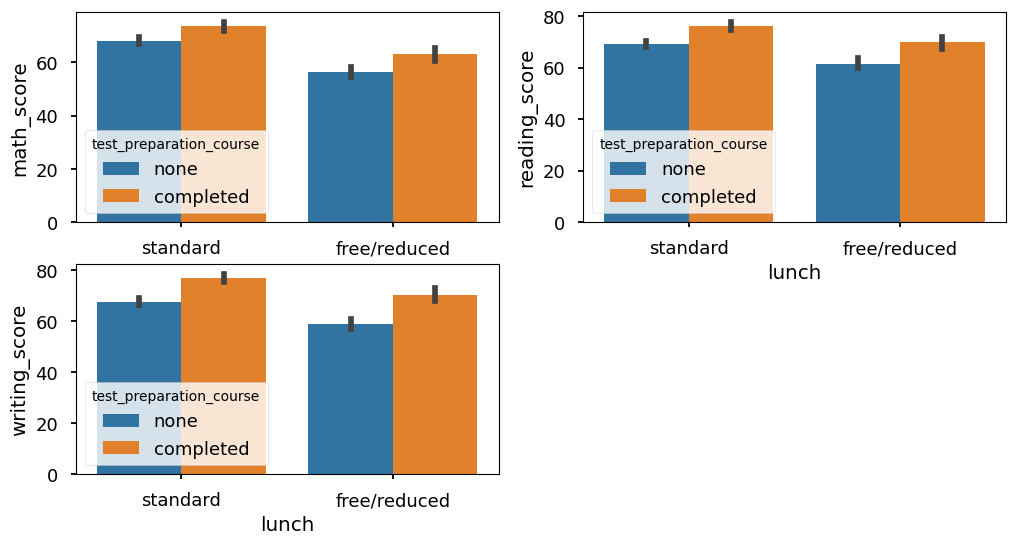

In [52]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

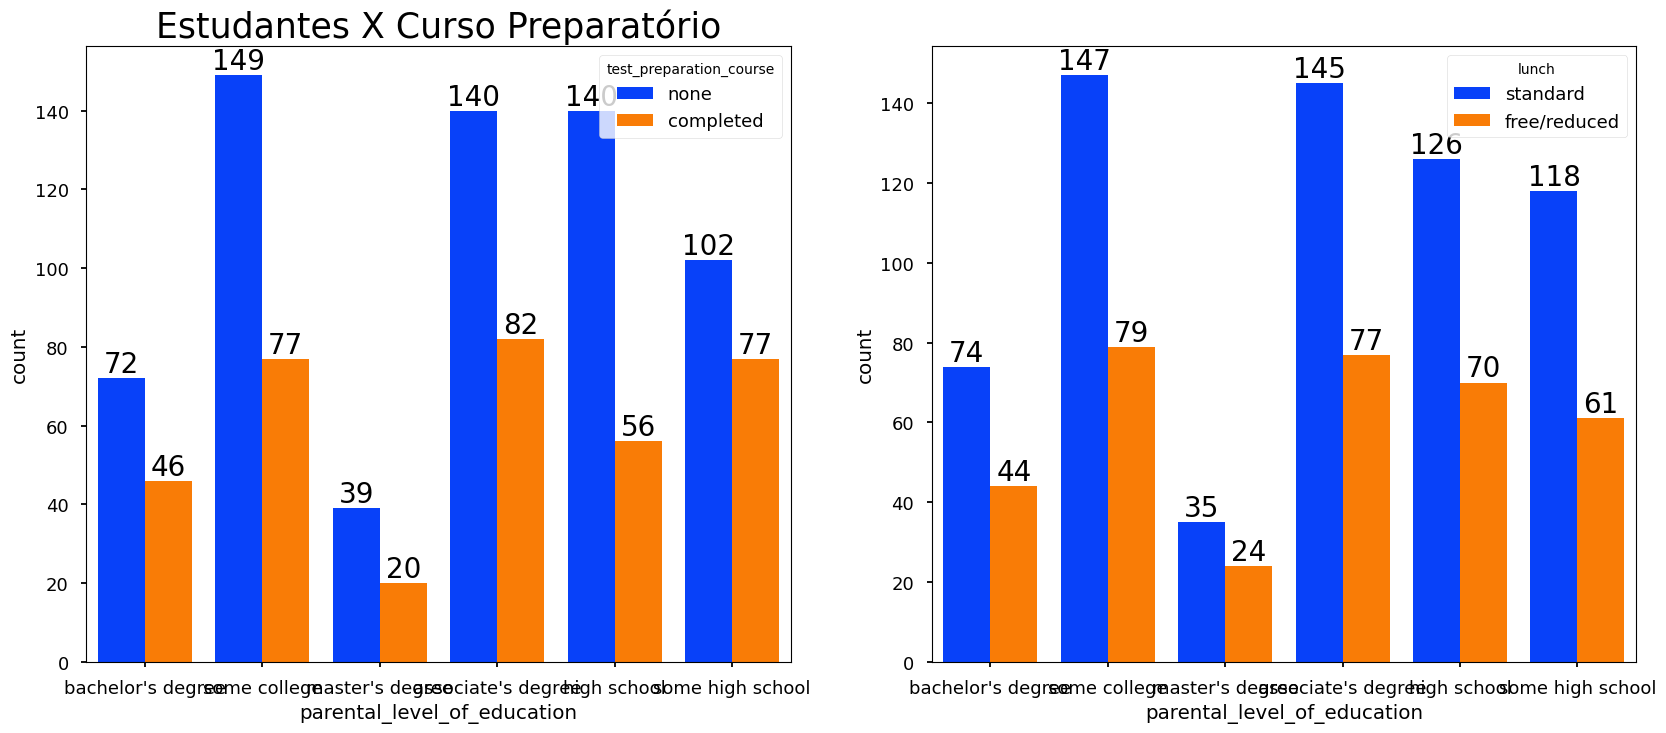

In [54]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Estudantes X Curso Preparatório',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

#### Informações 
- Os alunos que recebem almoço padrão tendem a ter melhor desempenho do que os alunos que recebem almoço grátis/a preço reduzido

#### 4.4.5 TESTE PREPARATÓRIO
- Que tipo de almoço é mais comum entre os estudantes?
- O curso de preparatório para testes tem algum impacto no desempenho dos alunos?

#### BIVARIATE ANALYSIS ( O curso de preparatório para testes tem algum impacto no desempenho dos alunos? )

<Axes: xlabel='lunch', ylabel='writing_score'>

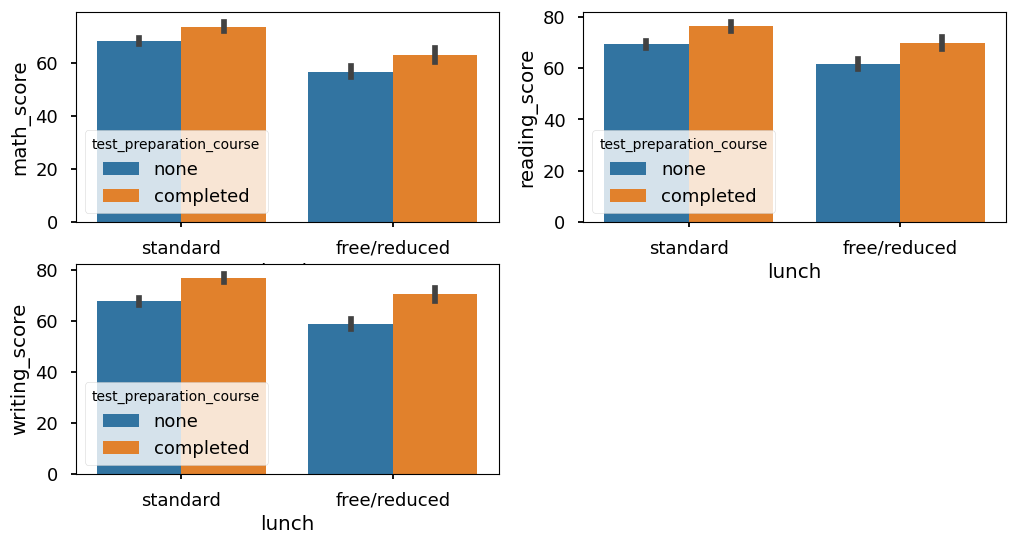

In [56]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

#### Informações  
- Os alunos que concluíram o Curso de Preparatório para Testes têm pontuações mais altas nas três categorias do que aqueles que não fizeram o curso

#### 4.4.6 VERIFICAÇÃO DE OUTLIERS

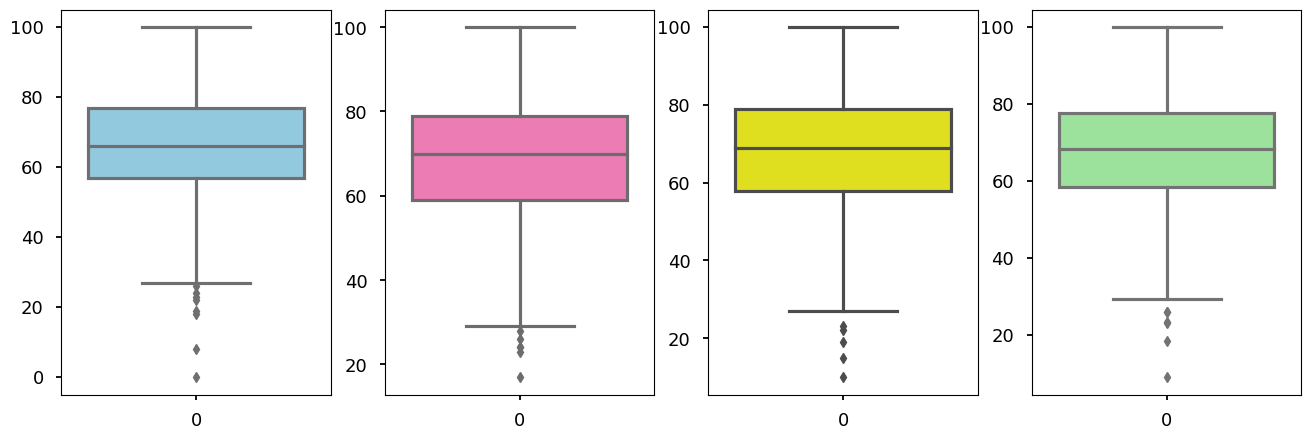

In [57]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['media'],color='lightgreen')
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USANDO PAIRPLOT

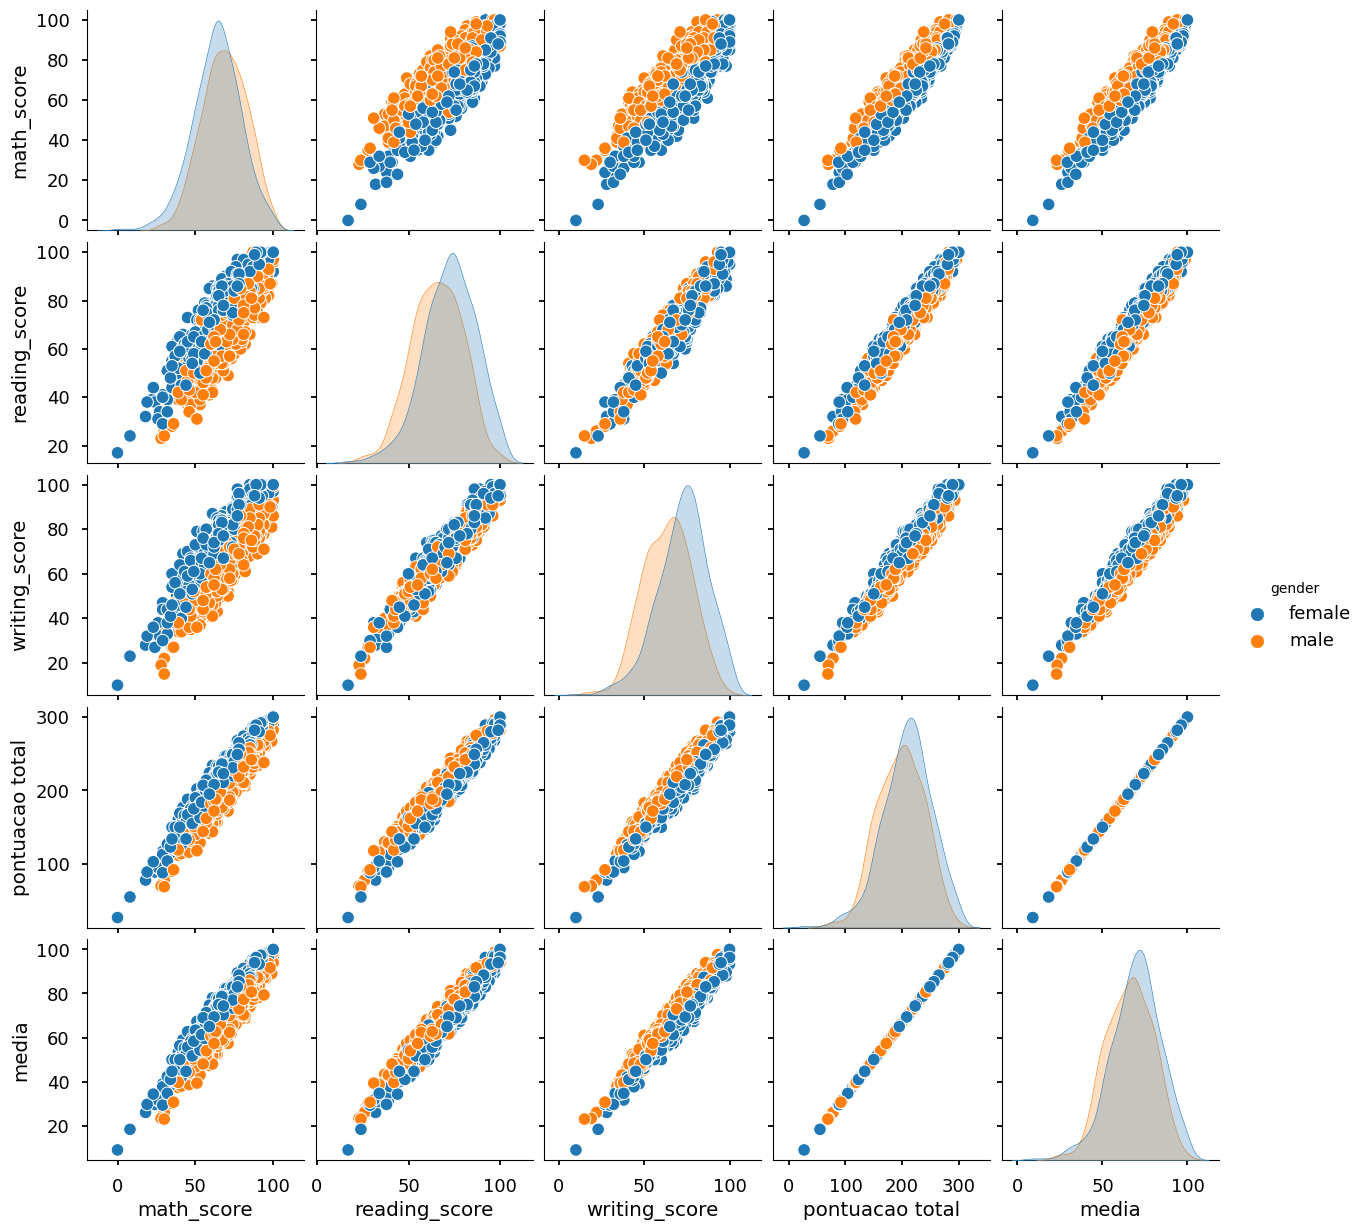

In [58]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Informações
- A partir do gráfico acima, fica claro que todas as pontuações aumentam linearmente entre si.

### 5. Conclusões
- O desempenho do aluno está relacionado com almoço, etnia e escolaridade dos pais.
- As mulheres lideram em porcentagem de aprovação e também são as maiores pontuadoras.
- O desempenho do aluno não está muito relacionado ao curso de preparatório para testes.
- Terminar o curso de preparatório é benéfico...